In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("test2.csv")

In [3]:
df.head(100)

,Unnamed: 0,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,...,66_x,66_y,67_x,67_y,Gaze,Blink,Blush,Brows,QuestionType,QuestionNumber
0,0,47,94,48,116,51,137,54,158,62,...,131,169,124,169,center,no blink,0.000000,normal,truth,1
1,1,43,90,44,113,47,136,51,159,58,...,130,175,122,174,right,blink,-1.581693,normal,truth,1
2,2,46,94,47,116,50,137,53,159,61,...,129,176,122,176,center,no blink,-0.884483,normal,truth,1
3,3,47,96,48,117,50,139,54,160,62,...,129,176,121,175,center,no blink,-0.146759,normal,truth,1
4,4,47,97,48,119,51,140,54,161,62,...,128,176,121,175,center,no blink,-0.671026,normal,truth,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,48,94,48,116,49,138,53,159,61,...,130,178,121,178,center,no blink,2.390485,high,truth,2
96,96,48,92,48,114,50,135,54,156,61,...,130,175,122,175,center,no blink,3.975428,normal,truth,2
97,97,45,92,46,114,49,136,53,157,60,...,129,177,121,176,center,no blink,3.052065,normal,truth,2
98,98,48,93,48,115,49,136,52,157,59,...,128,177,120,177,center,no blink,3.306228,high,truth,2


In [4]:
# MINMAX NORMALISER
def normalise(col):
    # Create x, where x the 'scores' column's values as floats
    df[[col]] = df[[col]].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(df[[col]])

    # Run the normalizer on the dataframe
    df[[col]] = pd.DataFrame(x_scaled)    

In [5]:
normalise('Blush')
normalise('20_y')
normalise('21_y')
normalise('22_y')
normalise('23_y')
normalise('24_y')
normalise('25_y')
normalise('26_y')

In [6]:
df.head(5)

,Unnamed: 0,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,...,66_x,66_y,67_x,67_y,Gaze,Blink,Blush,Brows,QuestionType,QuestionNumber
0,0,47,94,48,116,51,137,54,158,62,...,131,169,124,169,center,no blink,0.658621,normal,truth,1
1,1,43,90,44,113,47,136,51,159,58,...,130,175,122,174,right,blink,0.637193,normal,truth,1
2,2,46,94,47,116,50,137,53,159,61,...,129,176,122,176,center,no blink,0.646639,normal,truth,1
3,3,47,96,48,117,50,139,54,160,62,...,129,176,121,175,center,no blink,0.656633,normal,truth,1
4,4,47,97,48,119,51,140,54,161,62,...,128,176,121,175,center,no blink,0.649531,normal,truth,1


In [7]:
# -LABEL ENCODING-
#encoder = preprocessing.LabelEncoder()
#df['Gaze'] = encoder.fit_transform(df['Gaze'])
#df['Blink'] = encoder.fit_transform(df['Blink'])
#df['Brows'] = encoder.fit_transform(df['Brows'])
#df['QuestionType'] = encoder.fit_transform(df['QuestionType'])'''

In [8]:
# ONE HOT ENCODING
df = pd.concat([df,pd.get_dummies(df['Gaze'], prefix='Gaze')],axis=1).drop(['Gaze'],axis=1)
df = pd.concat([df,pd.get_dummies(df['Blink'], prefix='Blink')],axis=1).drop(['Blink'],axis=1)
df = pd.concat([df,pd.get_dummies(df['Brows'], prefix='Brows')],axis=1).drop(['Brows'],axis=1)
df = pd.concat([df,pd.get_dummies(df['QuestionType'], prefix='QuestionType')],axis=1).drop(['QuestionType'],axis=1)


In [9]:
df.head(5)

,Unnamed: 0,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,...,Gaze_center,Gaze_left,Gaze_right,Blink_blink,Blink_no blink,Brows_high,Brows_low,Brows_normal,QuestionType_lie,QuestionType_truth
0,0,47,94,48,116,51,137,54,158,62,...,1,0,0,0,1,0,0,1,0,1
1,1,43,90,44,113,47,136,51,159,58,...,0,0,1,1,0,0,0,1,0,1
2,2,46,94,47,116,50,137,53,159,61,...,1,0,0,0,1,0,0,1,0,1
3,3,47,96,48,117,50,139,54,160,62,...,1,0,0,0,1,0,0,1,0,1
4,4,47,97,48,119,51,140,54,161,62,...,1,0,0,0,1,0,0,1,0,1


In [10]:
test = df[['QuestionType_lie', 'Gaze_center', 'Gaze_left', 'Gaze_right', 'Blink_blink', 'Blink_no blink', 'Brows_high', 'Brows_low', 'Brows_normal', 'Blush', '20_y', '21_y', "22_y","23_y", "24_y", "25_y", "26_y"]]

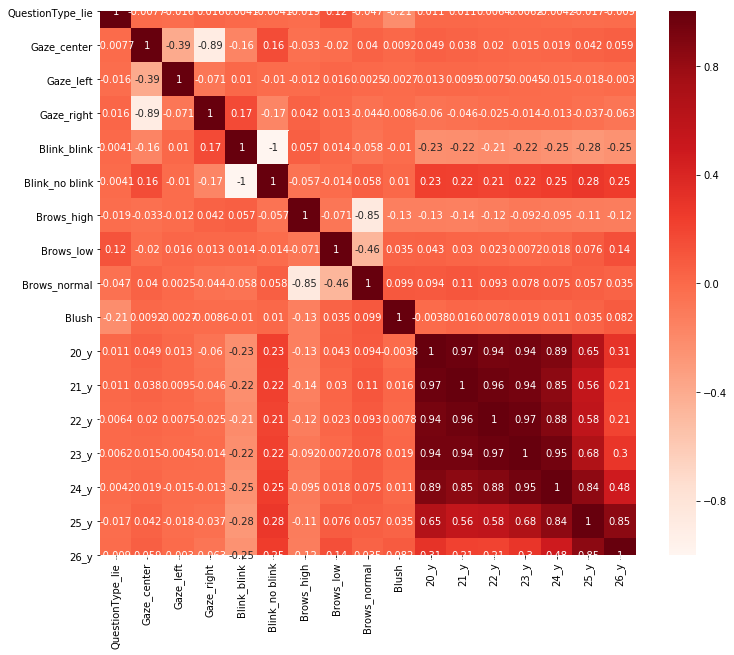

In [11]:
# Pearson Correlation

plt.figure(figsize=(12,10))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
# FINDING FEATURE CORRELATION

cor_target = abs(cor["QuestionType_lie"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.025]
relevant_features

QuestionType_lie    1.000000
Brows_low           0.121431
Brows_normal        0.046632
Blush               0.212620
Name: QuestionType_lie, dtype: float64

In [13]:
#target Feature
targetFeature = df['QuestionType_lie']

In [14]:
#descriptive features
X = df[['Gaze_center', 'Gaze_left', 'Gaze_right', 'Blink_blink', 'Blink_no blink', 'Brows_high', 'Brows_low', 'Brows_normal', 'Blush', '20_y', '21_y', "22_y","23_y", "24_y", "25_y", "26_y"]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, targetFeature, test_size=0.3, random_state=109)

C:\Users\laure\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


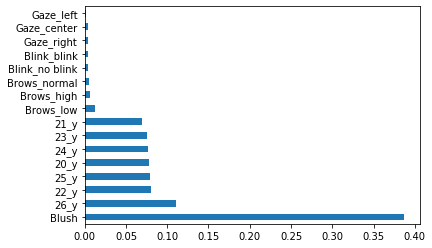

In [16]:
#Feature Importance

model = ExtraTreesClassifier()
model.fit(X,targetFeature)
#print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [17]:
# BUILDING CLASSIFIER
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8507397099750988


In [18]:
confusion_matrix(y_test, y_pred)

array([[5760,  896],
       [1142, 5856]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6656
           1       0.87      0.84      0.85      6998

    accuracy                           0.85     13654
   macro avg       0.85      0.85      0.85     13654
weighted avg       0.85      0.85      0.85     13654



In [20]:
# CROSS VALIDATION
scores = cross_val_score(classifier, X_train, y_train, cv=5)
scores


array([0.84293112, 0.84290647, 0.84382358, 0.84350965, 0.84350965])

In [21]:
# CROSS VALIDATION
cv = np.mean(cross_val_score(classifier, X_train, y_train, cv=10))
print ("Accuracy using RF with 10 cross validation : {}%".format(round(cv*100,2)))
y_predict_test = classifier.predict(X_test)

#F1_score

score_test = metrics.f1_score(y_test, y_predict_test, 
                              pos_label=list(set(y_test)), average = None)


score_test

Accuracy using RF with 10 cross validation : 84.73%


C:\Users\laure\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to [0, 1]) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([0.84968284, 0.85178182])